## Sonar Waves (Mine or Rock)

Sonar technology can be used to detect and classify underwater objects such as rocks and mines. The process typically involves emitting sound waves and analyzing the returning echoes to determine the characteristics of the objects in the water. This information can then be used to identify and locate rocks and mines.

There are different types of sonar systems that can be used for this purpose, including active sonar, which emits a sound signal and listens for the return, and passive sonar, which listens for the sound emitted by a target.

![Medical](https://www.ausseabed.gov.au/__data/assets/image/0013/61222/multibeam.png)

In order to classify objects as rocks or mines, the sonar data is usually processed and analyzed using algorithms, such as machine learning algorithms, that can identify specific features of the objects based on the characteristics of the echoes.

It's important to note that sonar detection is not 100% accurate and can be affected by environmental conditions such as water temperature, salinity, and sound absorption.

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
import random
import matplotlib.pyplot as plt

## Data Collection and Data Processing

Data processing, on the other hand, is the process of converting raw data into a format that can be analyzed and understood. This may involve cleaning and organizing the data, transforming it into a specific format, and running statistical or machine learning algorithms on it to extract insights and information.

Data collection and data processing are closely related, as the quality and accuracy of the processed data depend on the methods and instruments used for data collection.

In the context of sonar data, data collection would involve the use of sonar equipment to collect data on underwater objects, while data processing would involve cleaning and analyzing the collected data to identify and classify objects as rocks or mines.

Data Processing steps can be divided into several stages:

- Data cleaning: to remove or correct errors and inconsistencies in the data.
- Data integration: combine data from multiple sources.
- Data transformation: convert the data into a format that can be analyzed.
- Data reduction: Reduce the data set to a smaller set of relevant data.
- Data mining: Extracting information and knowledge from the data using statistical, machine learning or other techniques.
- Data visualization: Visualize the results of the analysis in order to make it more understandable.

After the data is processed, it can be used for a variety of purposes such as making predictions, identifying patterns, and detecting anomalies.

## The Dataset

This dataset was used in Gorman, R. P., and Sejnowski, T. J. (1988). “Analysis of Hidden Units in a Layered Network Trained to Classify Sonar Targets” in Neural Networks, Vol. 1, pp. 75-89.

The CSV files contain data regarding sonar signals bounced off a metal cylinder (mines - M) and a roughly cylindrical rock (rock - R) at various angles and under various conditions.

In [3]:
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/sonar.all-data.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# The spread of labels in the dataframe

df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

## Data Preprocessing

### Categorical features Handling
The class attribute has R and M to denote the classes. We have to convert them into numeric values.

Categorical features are features in a dataset that can be divided into categories. These features often have a limited number of distinct values and can be either ordinal (values have a natural ordering) or nominal (values do not have a natural ordering). Handling categorical features in a machine learning model typically involves encoding them into numerical values, such as using one-hot encoding or ordinal encoding. It is important to ensure that the encoding is done correctly to avoid introducing bias or affecting the model's performance.

In [5]:
df[60] = (df[60] == 'M').astype('int')
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [6]:
# Storing the class names corresponding to the index in arrays for reference later.

class_names = ['Rocks', 'Mines']

### Balancing Dataset

Even though there is only a difference of only 14 samples, in comparison to the total number of data samples available, this needs to be balanced.

Data balancing refers to the process of adjusting the distribution of samples in a dataset to address class imbalance. Class imbalance occurs when the number of samples in one class is much larger or smaller than the number of samples in other classes. This can be a problem in machine learning because it can lead to a model that is biased towards the majority class, resulting in poor performance on the minority class.

There are several techniques to balance data, such as:

- oversampling the minority class by duplicating samples
- undersampling the majority class by removing samples

synthetic data generation by creating new samples using techniques such as SMOTE (Synthetic Minority Over-sampling Technique)
It's important to note that oversampling techniques can lead to overfitting, while undersampling techniques can lead to loss of information. Therefore, it's important to evaluate the model performance on both training and validation set to check for overfitting. Additionally, it's important to consider the cost of misclassification for the specific problem to decide which class to balance.


In [7]:
# separating into 2 dataframes, one for each class 

df0 = df[df[60] == 0]
df1 = df[df[60] == 1]

In [9]:
print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

# Upsampling 

df0 = df0.sample(len(df1), replace = True)    # replace = True enables resampling

print('\nAfter resampling - ')

print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

Number of samples in:
Class label 0 -  97
Class label 1 -  111

After resampling - 
Number of samples in:
Class label 0 -  111
Class label 1 -  111


In [15]:
# concatente to form a single dataframe

df = pd.concat([df1, df0])

print('Total number of samples:', len(df))

Total number of samples: 222


In [16]:
# defining the input and output columns to separate the dataset in the later cells.

input_columns = list(df.columns[:-1]) 
output_columns = [df.columns[-1]]

print("Number of input columns: ", len(input_columns))
#print("Input columns: ", ', '.join(input_columns))

print("Number of output columns: ", len(output_columns))
#print("Output columns: ", ', '.join(output_columns))

Number of input columns:  60
Number of output columns:  1


## Data Splitting 

After separating the data and labels, it is common practice to further divide the data into two sets: a training set and a test set.

The training set is used to train the machine learning model and consists of a portion of the data and its corresponding labels. The model learns to make predictions based on the relationships and patterns in the training data.

The test set, on the other hand, is used to evaluate the performance of the trained model. It consists of a different portion of the data and its corresponding labels that the model has not seen during the training process. This set is used to assess the model's ability to generalize and make accurate predictions on unseen data.

Data splitting is an important step in the machine learning process because it ensures that the model is being evaluated on data it has not seen before, which gives a better understanding of the model's real-world performance.

The common practice is to split the data into a 70-80% training set and a 20-30% test set, but the ratio of the split can vary based on the size of the dataset and the specific application.



In [18]:
# Splitting into train and val set -- 90-10 split

train_df, val_df = train_test_split(df, test_size = 0.1, random_state = 2)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))

Number of samples in...
Training set:  199
Validation set:  23


In [19]:
# Looking into the spread of values in the train and val sets

print("Training - ")
print(train_df[60].value_counts())

print("\nValidation - ")
print(val_df[60].value_counts())

Training - 
1    100
0     99
Name: 60, dtype: int64

Validation - 
0    12
1    11
Name: 60, dtype: int64


In [20]:
# Splitting into X (input) and y (output)

Xtrain, ytrain = np.array(train_df[input_columns]), np.array(train_df[output_columns])

Xval, yval = np.array(val_df[input_columns]), np.array(val_df[output_columns])

In [22]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,0.028330,0.037425,0.043147,0.052344,0.072121,0.100405,0.122163,0.131581,0.170653,0.202018,...,0.012823,0.010096,0.010904,0.009209,0.007708,0.007957,0.007755,0.007491,0.006415,0.50000
std,0.022779,0.034333,0.038743,0.046158,0.054396,0.054819,0.059479,0.083679,0.114641,0.128975,...,0.009387,0.007030,0.007387,0.007149,0.005443,0.005750,0.006265,0.005909,0.004892,0.50113
min,0.001500,0.000600,0.001500,0.006100,0.007600,0.011600,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000900,0.000600,0.000100,0.000600,0.00000
25%,0.013200,0.014675,0.018800,0.023200,0.037350,0.064400,0.081700,0.080275,0.089900,0.109300,...,0.006600,0.004250,0.004825,0.003800,0.004500,0.003700,0.003500,0.003300,0.003000,0.00000
50%,0.020950,0.030850,0.033750,0.038700,0.059700,0.086150,0.105600,0.111700,0.145500,0.180800,...,0.009850,0.008050,0.009600,0.007500,0.006150,0.006100,0.005900,0.005900,0.005450,0.50000
75%,0.036050,0.045400,0.057300,0.062700,0.096250,0.130600,0.156850,0.168400,0.227525,0.266600,...,0.016300,0.014175,0.014875,0.012100,0.009775,0.010875,0.010200,0.009450,0.008000,1.00000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.307000,0.332200,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.00000


## Data Scaling

Data scaling refers to the process of normalizing or standardizing the values of the features in a dataset to ensure that all features are on a similar scale. This is important in machine learning because many models, such as neural networks and distance-based algorithms, are sensitive to the scale of the input features. Scaling the data can help the model converge faster and improve its performance.

There are several techniques to scale data:

- Min-Max Scaling: This scales the data to a specific range, such as [0,1]. It is calculated by (x-min)/(max-min)
- Standardization: This scales the data to have a mean of 0 and a standard deviation of 1. It is calculated by (x-mean)/stddev
- Z-score normalization: This scales the data to have a mean of 0 and a standard deviation of 1. It is calculated by (x-mean)/stddev

It's important to note that, for certain types of models, such as decision trees, scaling the data is not necessary as they are not affected by the scale of the input features. Additionally, for some data like time series, scaling the data can lead to losing the temporal relationship of the data, it's important to consider the specific problem and the model type before scaling the data

In [23]:
# Using standard scaler to standardize them to values with mean = 0 and variance = 1.

standard_scaler = StandardScaler()

# Fit on training set alone
Xtrain = standard_scaler.fit_transform(Xtrain)

# Use it to transform val and test input
Xval = standard_scaler.transform(Xval)
#Xtest = standard_scaler.transform(Xtest)

In [24]:
pd.DataFrame(Xtrain).describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,...,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02
mean,5.076899e-17,6.694812e-17,-1.829915e-16,-2.231604e-18,-3.046140e-16,3.074035e-16,2.811821e-16,-2.343184e-16,3.168878e-16,1.193908e-16,...,7.531664e-17,-1.368252e-16,-9.205367e-18,2.108866e-16,-6.248491e-17,1.295725e-16,3.886129e-17,-3.180036e-17,1.623492e-16,-1.724960e-16
std,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,...,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00
min,-1.181228e+00,-1.078751e+00,-1.095681e+00,-9.693369e-01,-1.148231e+00,-1.626850e+00,-2.055002e+00,-1.554987e+00,-1.458269e+00,-1.410223e+00,...,-1.168520e+00,-1.287978e+00,-1.332847e+00,-1.313575e+00,-1.223510e+00,-1.311264e+00,-1.201918e+00,-1.150819e+00,-1.244529e+00,-1.188813e+00
25%,-6.706738e-01,-6.433093e-01,-6.494969e-01,-6.166531e-01,-6.516010e-01,-6.405968e-01,-6.490028e-01,-6.355766e-01,-6.945734e-01,-7.621342e-01,...,-6.168984e-01,-6.560454e-01,-8.137379e-01,-8.306571e-01,-7.670502e-01,-5.998542e-01,-7.266778e-01,-6.671849e-01,-6.858944e-01,-6.893331e-01
50%,-3.259407e-01,-1.819993e-01,-2.443409e-01,-3.018696e-01,-2.192830e-01,-2.753866e-01,-2.413667e-01,-2.549834e-01,-2.372339e-01,-1.736922e-01,...,-1.648175e-01,-3.454344e-01,-3.367191e-01,-1.844993e-01,-2.107399e-01,-2.715110e-01,-3.193288e-01,-2.819172e-01,-2.796149e-01,-2.098319e-01
75%,3.460707e-01,2.088926e-01,3.403145e-01,2.287353e-01,4.291940e-01,5.421653e-01,5.462692e-01,4.438909e-01,5.080276e-01,4.900734e-01,...,4.158369e-01,3.721843e-01,5.331386e-01,5.636834e-01,4.168922e-01,2.939689e-01,4.868826e-01,4.066462e-01,3.128760e-01,3.895445e-01
max,4.735963e+00,5.626770e+00,6.709982e+00,7.880395e+00,5.879616e+00,3.812373e+00,3.625995e+00,3.985913e+00,4.469588e+00,3.876196e+00,...,7.035297e+00,6.220241e+00,4.068689e+00,3.297951e+00,5.067076e+00,5.802838e+00,4.670696e+00,5.964337e+00,4.900449e+00,7.462186e+00


## Modeling With Neural Network

Modeling with neural networks is a popular approach in machine learning for a wide range of tasks, including image recognition, natural language processing, and time series forecasting. Neural networks are a type of model inspired by the structure and function of the human brain and are composed of layers of interconnected nodes or "neurons."

The process of building a neural network model typically involves the following steps:

1. Define the architecture of the network, including the number of layers, the number of neurons in each layer, and the type of activation function to be used.
2. Initialize the model's parameters, such as the weights and biases of the neurons.
3. Feed the input data into the network and propagate it through the layers to obtain the output.
4. Use a loss function to measure the difference between the predicted output and the true output.
5. Use an optimizer to adjust the model's parameters to minimize the loss.
6. Repeat steps 3-5 for multiple epochs using the training data.
7. Evaluate the model's performance on the validation or test data.
8. Repeat steps 3-7 with different architectures and hyperparameters to find the best model.

It's important to note that neural networks can be prone to overfitting, which occurs when a model is too complex and memorizes the training data. To avoid overfitting, techniques such as regularization, early stopping, and dropout can be used. Additionally, it's important to have enough data to train the model and monitor the performance during the training to stop it when it's no longer improving.



In [25]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = Xtrain[0].shape),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

cb = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3904      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs=16, callbacks = cb)

Epoch 1/16
7/7 [==============================] - 1s 66ms/step - loss: 0.5557 - accuracy: 0.6935 - val_loss: 0.6761 - val_accuracy: 0.7391
Epoch 2/16
7/7 [==============================] - 0s 9ms/step - loss: 0.2491 - accuracy: 0.9196 - val_loss: 0.2135 - val_accuracy: 0.9130
Epoch 3/16
7/7 [==============================] - 0s 6ms/step - loss: 0.1518 - accuracy: 0.9447 - val_loss: 0.1433 - val_accuracy: 0.8696
Epoch 4/16
7/7 [==============================] - 0s 8ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0733 - val_accuracy: 1.0000
Epoch 5/16
7/7 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9950 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 6/16
7/7 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 7/16
7/7 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 8/16
7/7 [=================

In [27]:
model.evaluate(Xval, yval)


1/1 [==============================] - 0s 31ms/step - loss: 0.0102 - accuracy: 1.0000


[0.010160206817090511, 1.0]

In [30]:
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs=16, callbacks = cb)

Epoch 1/16
7/7 [==============================] - 1s 23ms/step - loss: 4.1422e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 2/16
7/7 [==============================] - 0s 8ms/step - loss: 1.4801e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3/16
7/7 [==============================] - 0s 6ms/step - loss: 9.5196e-05 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 4/16
7/7 [==============================] - 0s 7ms/step - loss: 5.2606e-05 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 5/16
7/7 [==============================] - 0s 6ms/step - loss: 3.1738e-05 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/16
7/7 [==============================] - 0s 7ms/step - loss: 2.4331e-05 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 7/16
7/7 [==============================] - 0s 7ms/step - loss: 1.9515e-05 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch

In [31]:
def plot(history1, history2, variable1, variable2):
    # combining metrics from both trainings    
    var1_history = history1[variable1]
    var1_history.extend(history2[variable1])
    
    var2_history = history1[variable2]
    var2_history.extend(history2[variable2])
    
    # plotting them
    plt.plot(range(len(var1_history)), var1_history)
    plt.plot(range(len(var2_history)), var2_history)
    plt.legend([variable1, variable2])
    plt.title(variable1)

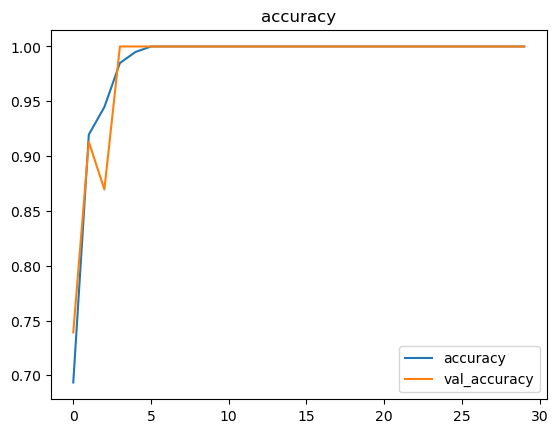

In [32]:
plot(history1.history, history2.history, "accuracy", 'val_accuracy')


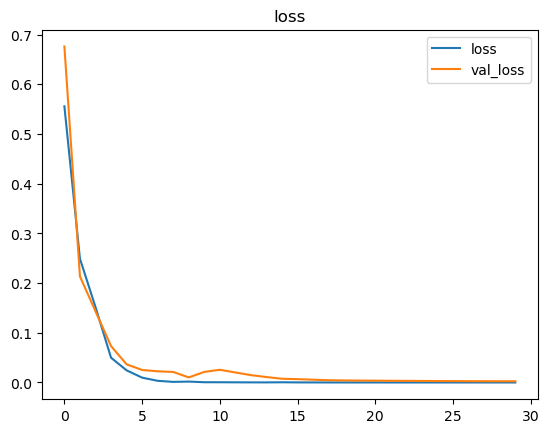

In [33]:
plot(history1.history, history2.history, "loss", 'val_loss')


## Use model to make Predictions


In [34]:
# pick random test data sample from one batch
x = random.randint(0, len(Xval) - 1)

output_true = np.array(yval)[x][0]
print("True: ", class_names[output_true])

output = model.predict(Xval[x].reshape(1, -1))[0][0]
pred = int(output>0.5)    # finding max
print("Predicted: ", class_names[pred], "(",output, "-->", pred, ")") 

True:  Rocks
1/1 [==============================] - 0s 93ms/step
Predicted:  Rocks ( 1.65114e-09 --> 0 )
